## Análise Fatorial e PCA
### MBA em Data Science e Analytics USP ESALQ

**Prof Dr.** Wilson Tarantin Junior

**Aluna:** Luiza Batista Laquini

**Turma:** DSA 2024-1

### Bibliotecas e configurações

In [55]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import shapefile as shp
from sklearn.preprocessing import MinMaxScaler  # type: ignore

#import plotly.io as pio
#pio.renderers.default='browser'

import warnings
warnings.filterwarnings("ignore")

### Visualização dos Dados

In [56]:
# Leitura dos dados
atlas = pd.read_excel("atlas_ambiental.xlsx")

print(atlas.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cód_ibge      96 non-null     int64  
 1   distritos     96 non-null     object 
 2   renda         96 non-null     int64  
 3   quota         96 non-null     float64
 4   escolaridade  96 non-null     float64
 5   idade         96 non-null     int64  
 6   mortalidade   96 non-null     float64
 7   txcresc       96 non-null     float64
 8   causasext     96 non-null     float64
 9   favel         96 non-null     float64
 10  denspop       96 non-null     float64
dtypes: float64(7), int64(3), object(1)
memory usage: 8.4+ KB
None


In [57]:
atlas.head(3)

,cód_ibge,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
0,1,Água Rasa,1961,34.619999,7.6,32,13.86,-1.840000,52.98,0.00,125.610001
1,2,Alto de Pinheiros,4180,75.959999,8.4,33,8.68,-2.520000,38.57,0.69,57.560001
2,3,Anhanguera,1093,4.500000,5.8,23,15.36,18.120001,22.68,0.00,8.570000


In [58]:
# Estatísticas descritivas
tab_desc = atlas.drop(columns=['cód_ibge']).describe()
tab_desc = tab_desc.T
tab_desc

,count,mean,std,min,25%,50%,75%,max
renda,96.0,1856.218750,970.774441,159.00,1150.000000,1628.000000,2315.500000,5146.000000
quota,96.0,30.478021,23.040243,0.61,12.400000,24.304999,40.989999,104.730003
escolaridade,96.0,7.075000,1.008908,4.80,6.300000,7.000000,7.850000,9.200000
idade,96.0,27.395833,4.385332,20.00,23.000000,27.000000,31.000000,36.000000
mortalidade,96.0,15.992812,4.994409,6.46,12.960000,16.230000,18.720001,44.250000
txcresc,96.0,0.041146,3.509652,-6.24,-2.042500,-0.835000,1.342500,18.120001
causasext,96.0,71.086667,23.315169,22.68,56.417499,70.395000,82.370001,127.370003
favel,96.0,5.932187,7.883762,0.00,0.000000,3.015000,7.837500,45.689999
denspop,96.0,99.860104,49.606814,0.37,64.317497,96.165001,136.222500,249.600006


Temos escalas diferentes -> necessário normalizar.

Por mais que a normalização idealmente nao afete as relações entre as variáveis, é interessante verificar a correlação dos dados antes de normalizá-los!

### Correlação Linear

In [59]:
# Permanecendo somente com as variáveis quantitativas
atlas_target = atlas.drop(columns=['cód_ibge', 'distritos'])

# Correlação Linear
corr = atlas_target.corr()

# Mapa de calor
fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x = corr.columns,
        y = corr.index,
        z = np.array(corr),
        text=corr.values,
        texttemplate='%{text:.4f}',
        colorscale='viridis'))
fig.update_layout(
    height = 700,
    width = 700,
    yaxis=dict(autorange="reversed"))
fig.show()

### Normalização # NÃO MUDOU (PQ?)

In [60]:
# Criando um objeto MinMaxScaler
scaler = MinMaxScaler()

# Aplicando o MinMaxScaler aos dados
atlas_normalizado = pd.DataFrame(scaler.fit_transform(atlas_target), columns=atlas_target.columns)

# Visualizando os dados normalizados
atlas_normalizado

,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
0,0.361339,0.326642,0.636364,0.7500,0.195819,0.180624,0.289426,0.000000,0.502508
1,0.806296,0.723684,0.818182,0.8125,0.058746,0.152709,0.151781,0.015102,0.229467
2,0.187287,0.037361,0.227273,0.1875,0.235512,1.000000,0.000000,0.000000,0.032901
3,0.231001,0.196024,0.454545,0.4375,0.316750,0.212233,0.511415,0.117750,0.554387
4,0.218368,0.146946,0.500000,0.4375,0.351151,0.198686,0.425733,0.089954,0.670184
...,...,...,...,...,...,...,...,...,...
91,0.249850,0.183922,0.454545,0.4375,0.237364,0.198276,0.528226,0.054498,0.756570
92,0.320032,0.302247,0.545455,0.6250,0.209050,0.151478,0.418665,0.162618,0.405529
93,0.563666,0.391856,0.590909,0.4375,0.272559,0.219212,0.496705,0.326767,0.319986
94,0.378584,0.219939,0.454545,0.3750,0.207462,0.285304,0.378928,0.187131,0.291097


### Teste de Esfericidade de Barlett

Usado para investigar a adequação global da análise fatorial. Compara a matriz de correlações com a matriz identidade de mesma dimensão e espera-se que tais matrizes sejam diferentes para que a análise seja aplicável.

Interpretação dos resultados:

- Qui²: Um valor alto de qui-quadrado indica que a hipótese nula (de que a matriz de correlação é uma matriz identidade) é improvável. 
- p-valor: chance da hipótese nula ser verdadeira (lembrando que o objetivo é rejeitar a hipótese nula para que o modelo seja aplicável)

In [61]:
# Teste de Esfericidade de Barlett
bartlett, p_value = calculate_bartlett_sphericity(atlas_normalizado)

print(f'Qui² Bartlett: {round(bartlett, 2)}')
print(f'p-valor: {round(p_value, 4)}')

Qui² Bartlett: 748.16
p-valor: 0.0


Os resultados do teste de esfericidade de Bartlett fornecem evidência forte de que as correlações entre as variáveis são significativas e, portanto, a análise fatorial é adequada para o conjunto de dados.

### PCA

In [62]:
fa = FactorAnalyzer(n_factors=9, method='principal', rotation=None).fit(atlas_normalizado)

In [63]:
# Obtendo os eigenvalues (autovalores)
autovalores = fa.get_eigenvalues()[0]
autovalores

array([4.95603069, 1.16433814, 0.99635412, 0.72406663, 0.52930223,
       0.39832415, 0.12966871, 0.06506649, 0.03684884])

O **critério de Kaiser** (ou **critério da raiz latente**) indica que sejam considerados apenas fatores correspondentes a
autovalores > 1

In [64]:
# Parametrizando a PCA para os fatores derivados de autovalores > 1
fa = FactorAnalyzer(n_factors=2, method='principal', rotation=None).fit(atlas_normalizado)

# Autovalores, variâncias e variâncias acumuladas
autovalores_fatores = fa.get_factor_variance()
tabela_eigen = pd.DataFrame(autovalores_fatores)
tabela_eigen.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_eigen.columns)]
tabela_eigen.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen = tabela_eigen.T
print(tabela_eigen)

         Autovalor  Variância  Variância Acumulada
Fator 1   4.956031   0.550670             0.550670
Fator 2   1.164338   0.129371             0.680041


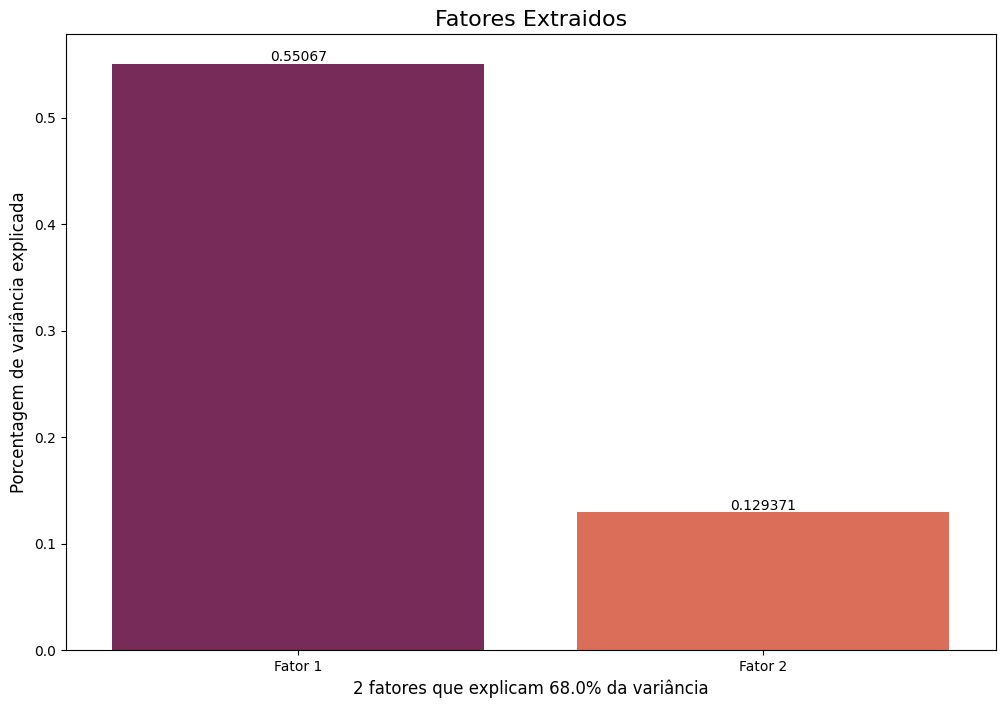

In [65]:
# Gráfico de variância acumulada dos componentes principais
plt.figure(figsize=(12,8))
ax = sns.barplot(x=tabela_eigen.index, y=tabela_eigen['Variância'], data=tabela_eigen, palette='rocket')
ax.bar_label(ax.containers[0])
plt.title("Fatores Extraidos", fontsize=16)
plt.xlabel(f"{tabela_eigen.shape[0]} fatores que explicam {round(tabela_eigen['Variância'].sum()*100,2)}% da variância", fontsize=12)
plt.ylabel("Porcentagem de variância explicada", fontsize=12)
plt.show()

#### Cargas Fatoriais

In [66]:
# Cargas Fatoriais
cargas_fatoriais = fa.loadings_

tabela_cargas = pd.DataFrame(cargas_fatoriais)
tabela_cargas.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_cargas.columns)]
tabela_cargas.index = atlas_normalizado.columns

print(tabela_cargas)

               Fator 1   Fator 2
renda         0.832127  0.368971
quota         0.900606  0.226453
escolaridade  0.966543 -0.024594
idade         0.960135 -0.065447
mortalidade  -0.655699 -0.176634
txcresc      -0.696781  0.337446
causasext    -0.666578 -0.043910
favel        -0.457185  0.442840
denspop       0.166281 -0.793048


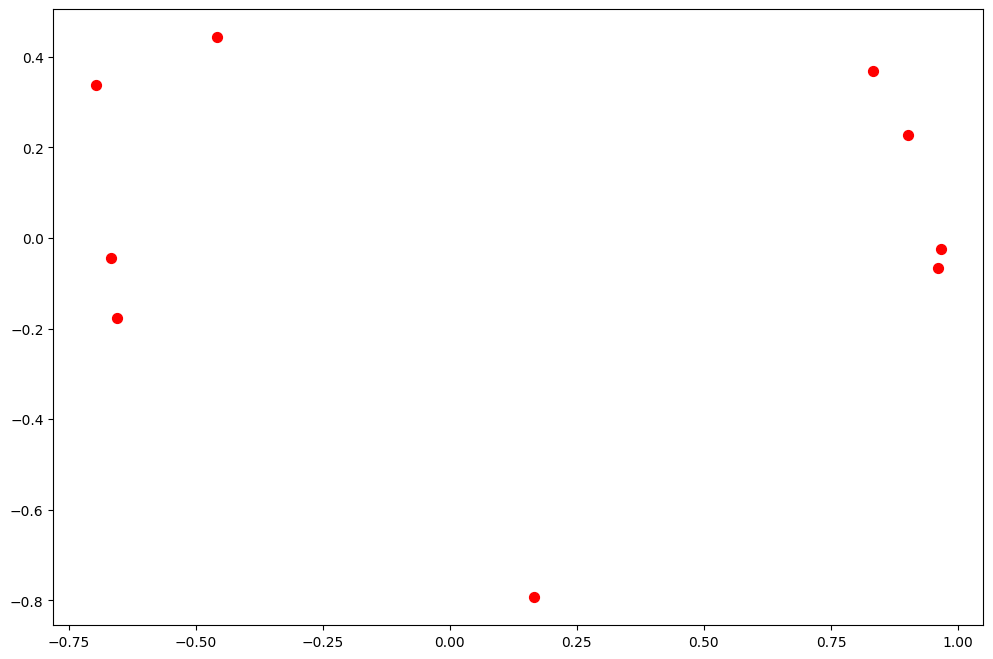

In [67]:
# Gráfico das cargas fatoriais (loading plot)
plt.figure(figsize=(12,8))
tabela_cargas_chart = tabela_cargas.reset_index()
plt.scatter(tabela_cargas_chart['Fator 1'], tabela_cargas_chart['Fator 2'], s=50, color='red')

In [68]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.05, point['y'], point['val'])

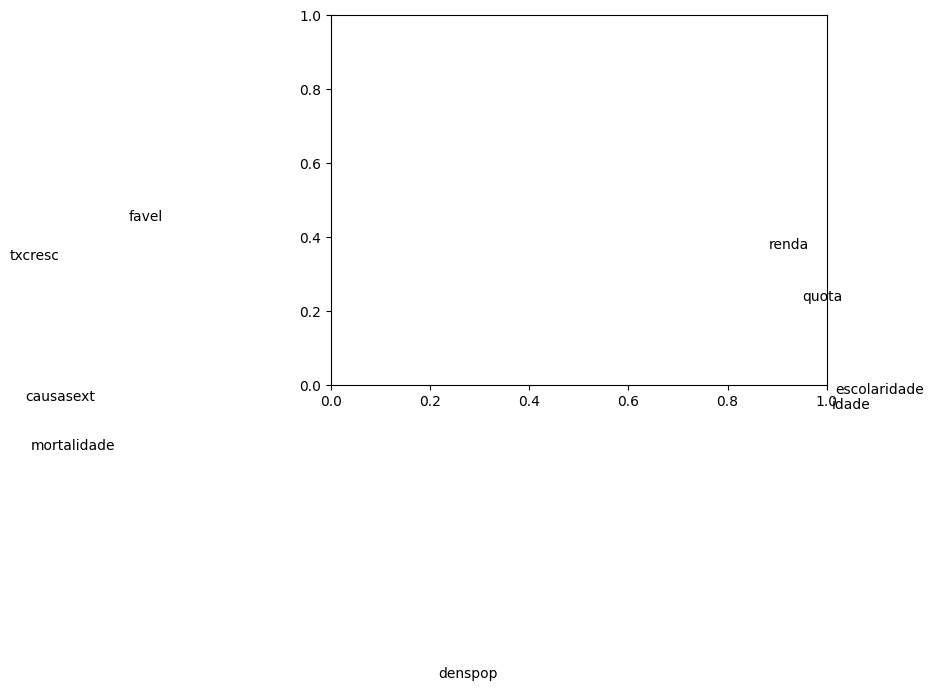

In [69]:
label_point(x = tabela_cargas_chart['Fator 1'],
            y = tabela_cargas_chart['Fator 2'],
            val = tabela_cargas_chart['index'],
            ax = plt.gca()) 

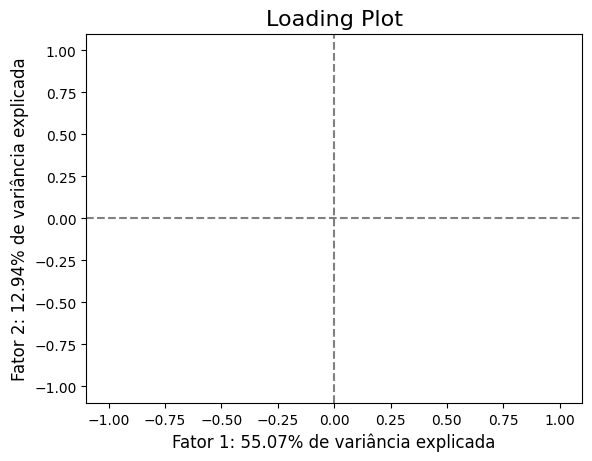

In [70]:
plt.axhline(y=0, color='grey', ls='--')
plt.axvline(x=0, color='grey', ls='--')
plt.ylim([-1.1,1.1])
plt.xlim([-1.1,1.1])
plt.title("Loading Plot", fontsize=16)
plt.xlabel(f"Fator 1: {round(tabela_eigen.iloc[0]['Variância']*100,2)}% de variância explicada", fontsize=12)
plt.ylabel(f"Fator 2: {round(tabela_eigen.iloc[1]['Variância']*100,2)}% de variância explicada", fontsize=12)
plt.show()

#### Comunalidades

In [71]:
# Comunalidades
comunalidades = fa.get_communalities()

tabela_comunalidades = pd.DataFrame(comunalidades)
tabela_comunalidades.columns = ['Comunalidades']
tabela_comunalidades.index = atlas_normalizado.columns

print(tabela_comunalidades)

              Comunalidades
renda              0.828575
quota              0.862372
escolaridade       0.934811
idade              0.926143
mortalidade        0.461141
txcresc            0.599374
causasext          0.446254
favel              0.405126
denspop            0.656574


#### Scores fatoriais

In [72]:
# Fatores
fatores = pd.DataFrame(fa.transform(atlas_normalizado))
fatores.columns =  [f"Fator {i+1}" for i, v in enumerate(fatores.columns)]

In [73]:
# Adicionando os fatores ao banco de dados
atlas = pd.concat([atlas.reset_index(drop=True), fatores], axis=1)

In [74]:
# Identificando os scores fatoriais 
scores = fa.weights_

tabela_scores = pd.DataFrame(scores)
tabela_scores.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_scores.columns)]
tabela_scores.index = atlas_normalizado.columns

print(tabela_scores)

               Fator 1   Fator 2
renda         0.167902  0.316893
quota         0.181719  0.194491
escolaridade  0.195024 -0.021122
idade         0.193731 -0.056210
mortalidade  -0.132303 -0.151703
txcresc      -0.140593  0.289818
causasext    -0.134498 -0.037712
favel        -0.092248  0.380336
denspop       0.033551 -0.681115


Considere que o primeiro fator seja adequado para o ranking de distritos.

Note que adotamos um critério distinto da "soma ponderada".

### Mapa SP

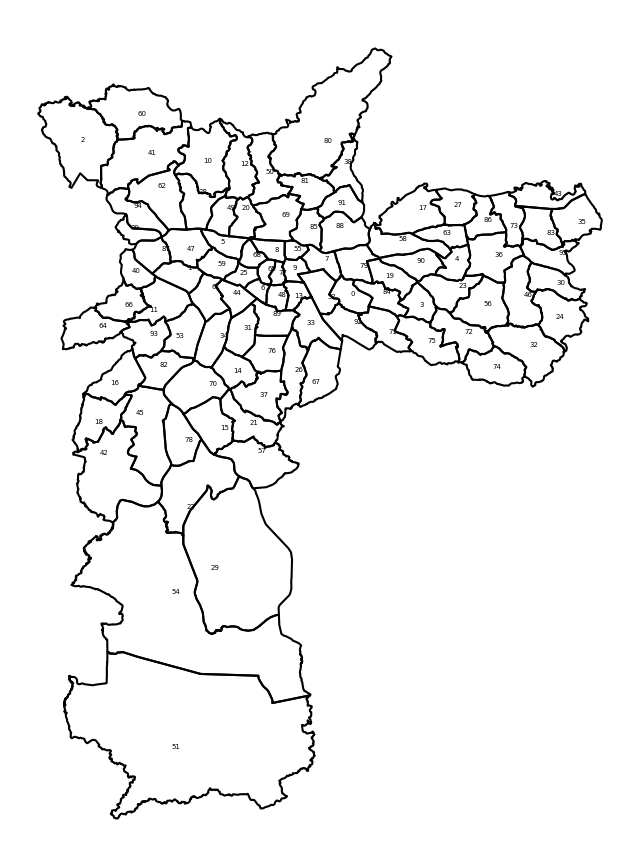

In [75]:
dados_mapa = atlas[['cód_ibge', 'distritos', 'Fator 1']].sort_values(by=['cód_ibge'], ascending = True).reset_index(drop=True)

sf = shp.Reader("DEINFO_DISTRITO")

def read_shapefile(sf):
    fields = [x[0] for x in sf.fields][1:]
    records = [y[:] for y in sf.records()]
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df
  
dist = read_shapefile(sf)

# Fonte: http://dados.prefeitura.sp.gov.br/dataset/distritos

# Organizando o banco de dados das coordenadas
dist['COD_DIST'] = pd.to_numeric(dist['COD_DIST'])
dist = dist.sort_values(by=['COD_DIST'], ascending = True).reset_index(drop=True)

# Gerando o mapa da cidade de SP com distritos delimitados
def plot_map(df, x_lim = None, y_lim = None, figsize = (8,11)):
    
    plt.figure(figsize = figsize)
    id=0
    for coordinates in df.coords:
        x = [i[0] for i in coordinates]
        y = [i[1] for i in coordinates]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=5)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        
    plt.axis('off')
    
plot_map(dist)

# Referência: https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f

<Figure size 800x1100 with 0 Axes>

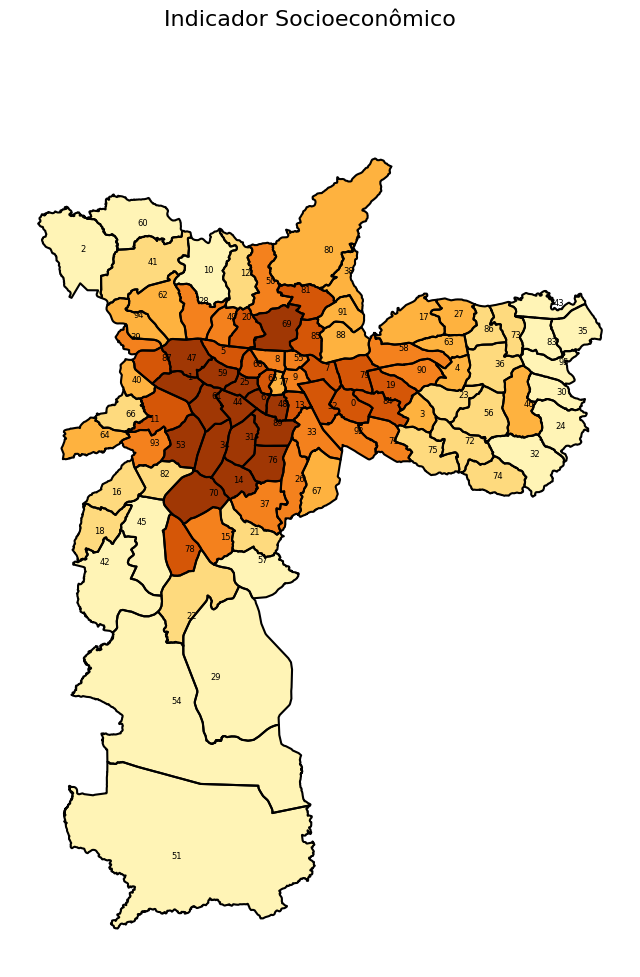

In [76]:
# Definindo as cores
# Vamos dividir os valores do fator em 6 faixas
def calc_color(data):
        new_data = pd.qcut(data, 6, labels=list(range(6)))
        paleta = sns.color_palette('YlOrBr', n_colors=6)
        color_sq = paleta.as_hex()
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val])
        return color_ton
    
# Plotando o mapa com as cores
def plot_map_fill_multiples_ids_3(df, title, distrito_id, color_ton, x_lim = None, y_lim = None, figsize = (8,11)):
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for coordinates in df.coords:
        x = [i[0] for i in coordinates]
        y = [i[1] for i in coordinates]
        plt.plot(x, y, 'k')
            
    for id in distrito_id:
        shape_ex = df.coords[id]
        x_lon = np.zeros((len(shape_ex),1))
        y_lat = np.zeros((len(shape_ex),1))
        for ip in range(len(shape_ex)):
            x_lon[ip] = shape_ex[ip][0]
            y_lat[ip] = shape_ex[ip][1]
        ax.fill(x_lon,y_lat,  color_ton[distrito_id.index(id)]);
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        plt.text(x0, y0, id, fontsize=6)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
    
    plt.axis('off')
        
distritos = list(np.arange(96)) # id_distritos
data = list(dados_mapa['Fator 1']) # indicador socioeconÃ´mico (fator)
color_ton = calc_color(data) # tonalidade de cores
plot_map_fill_multiples_ids_3(dist, 'Indicador Socioeconômico', distritos, color_ton)